In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
train = pd.read_csv('Train.csv')
train.drop(columns='id', inplace=True)
train

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3,2,2,2,10.30,1,0,32,36509,0,0,0,0,0,62.09
1,5.00,2,4,0,3,6.66,1,0,1,28206,1,0,0,0,0,121.80
2,14.08,4,0,0,3,21.30,1,0,26,21215,1,0,0,0,0,83.51
3,4.02,3,5,0,0,14.80,0,1,36,21215,1,0,0,0,0,66.78
4,2.13,3,5,0,3,17.00,1,1,20,27694,1,1,1,1,1,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4,5,5,3,13.50,1,0,33,30268,0,0,0,0,0,133.42
360332,14.44,4,4,0,4,18.80,1,1,18,20319,0,0,0,0,0,81.85
360333,10.74,3,0,0,2,11.30,1,0,35,30584,1,1,1,1,1,87.07
360334,11.04,3,1,0,3,10.20,0,1,14,30584,1,1,1,1,1,146.72


In [3]:
train.columns = ['store_sales_in_millions', 'unit_sales_in_millions', 'total_children', 'num_children_at_home', 'avg_cars_at_home', 'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost']

In [4]:
train

,store_sales_in_millions,unit_sales_in_millions,total_children,num_children_at_home,avg_cars_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3,2,2,2,10.30,1,0,32,36509,0,0,0,0,0,62.09
1,5.00,2,4,0,3,6.66,1,0,1,28206,1,0,0,0,0,121.80
2,14.08,4,0,0,3,21.30,1,0,26,21215,1,0,0,0,0,83.51
3,4.02,3,5,0,0,14.80,0,1,36,21215,1,0,0,0,0,66.78
4,2.13,3,5,0,3,17.00,1,1,20,27694,1,1,1,1,1,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4,5,5,3,13.50,1,0,33,30268,0,0,0,0,0,133.42
360332,14.44,4,4,0,4,18.80,1,1,18,20319,0,0,0,0,0,81.85
360333,10.74,3,0,0,2,11.30,1,0,35,30584,1,1,1,1,1,87.07
360334,11.04,3,1,0,3,10.20,0,1,14,30584,1,1,1,1,1,146.72


In [5]:
fit1 = sm.ols('cost~unit_sales_in_millions+total_children+avg_cars_at_home+store_sqft+coffee_bar+video_store+florist', data=train).fit()

In [6]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:43:40   Log-Likelihood:            -1.7326e+06
No. Observations:              360336   AIC:                         3.465e+06
Df Residuals:                  360328   BIC:                         3.465e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                110.8091      0.343    322.837      0.000     110.136     111.482
unit_sales_in_millions    -0.4249      0.064     -6.596      0.000      -0.551      -0.299
total_children            -0.2159      0.034     -6.445      0.000      -0.282      -0.150
avg_cars_at_home           0.7621      0.046     16.672      0.000       0.672       0.852
store_sqft                -0.0003   8.46e-06    -33.438      0.000      -0.000      -0.000
coffee_bar                 1.1903      0.130      9.191      0.000       0.936       1.444
video_store               -4.8910      0.147    -33.178      0.000      -5.180      -4.602
florist                   -4.7661      0.134    -35.618      0.000      -5.028      -4.504
==============================================================================
Omnibus:                   325850.052   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21759.100
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                       1.798   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X = add_constant(train)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]

In [ ]:
vif

,Features,VIF
0,const,86.323773
1,store_sales_in_millions,1.306204
2,unit_sales_in_millions,1.349369
3,total_children,1.164147
4,num_children_at_home,1.159701
5,avg_cars_at_home,1.017033
6,gross_weight,1.006505
7,recyclable_package,1.005368
8,low_fat,1.002894
9,units_per_case,1.001342


In [ ]:
newDf = pd.DataFrame({'unit_sales_in_millions': train['unit_sales_in_millions'], 'total_children':train['total_children'], 'avg_cars_at_home':train['avg_cars_at_home'], 'store_sqft': train['store_sqft'], 'coffee_bar': train['coffee_bar'], 'video_store': train['video_store'], 'florist': train['florist'],'cost': train['cost']})

In [ ]:
newDf

,unit_sales_in_millions,total_children,avg_cars_at_home,store_sqft,coffee_bar,video_store,florist,cost
0,3,2,2,36509,0,0,0,62.09
1,2,4,3,28206,1,0,0,121.80
2,4,0,3,21215,1,0,0,83.51
3,3,5,0,21215,1,0,0,66.78
4,3,5,3,27694,1,1,1,111.51
...,...,...,...,...,...,...,...,...
360331,4,5,3,30268,0,0,0,133.42
360332,4,4,4,20319,0,0,0,81.85
360333,3,0,2,30584,1,1,1,87.07
360334,3,1,3,30584,1,1,1,146.72


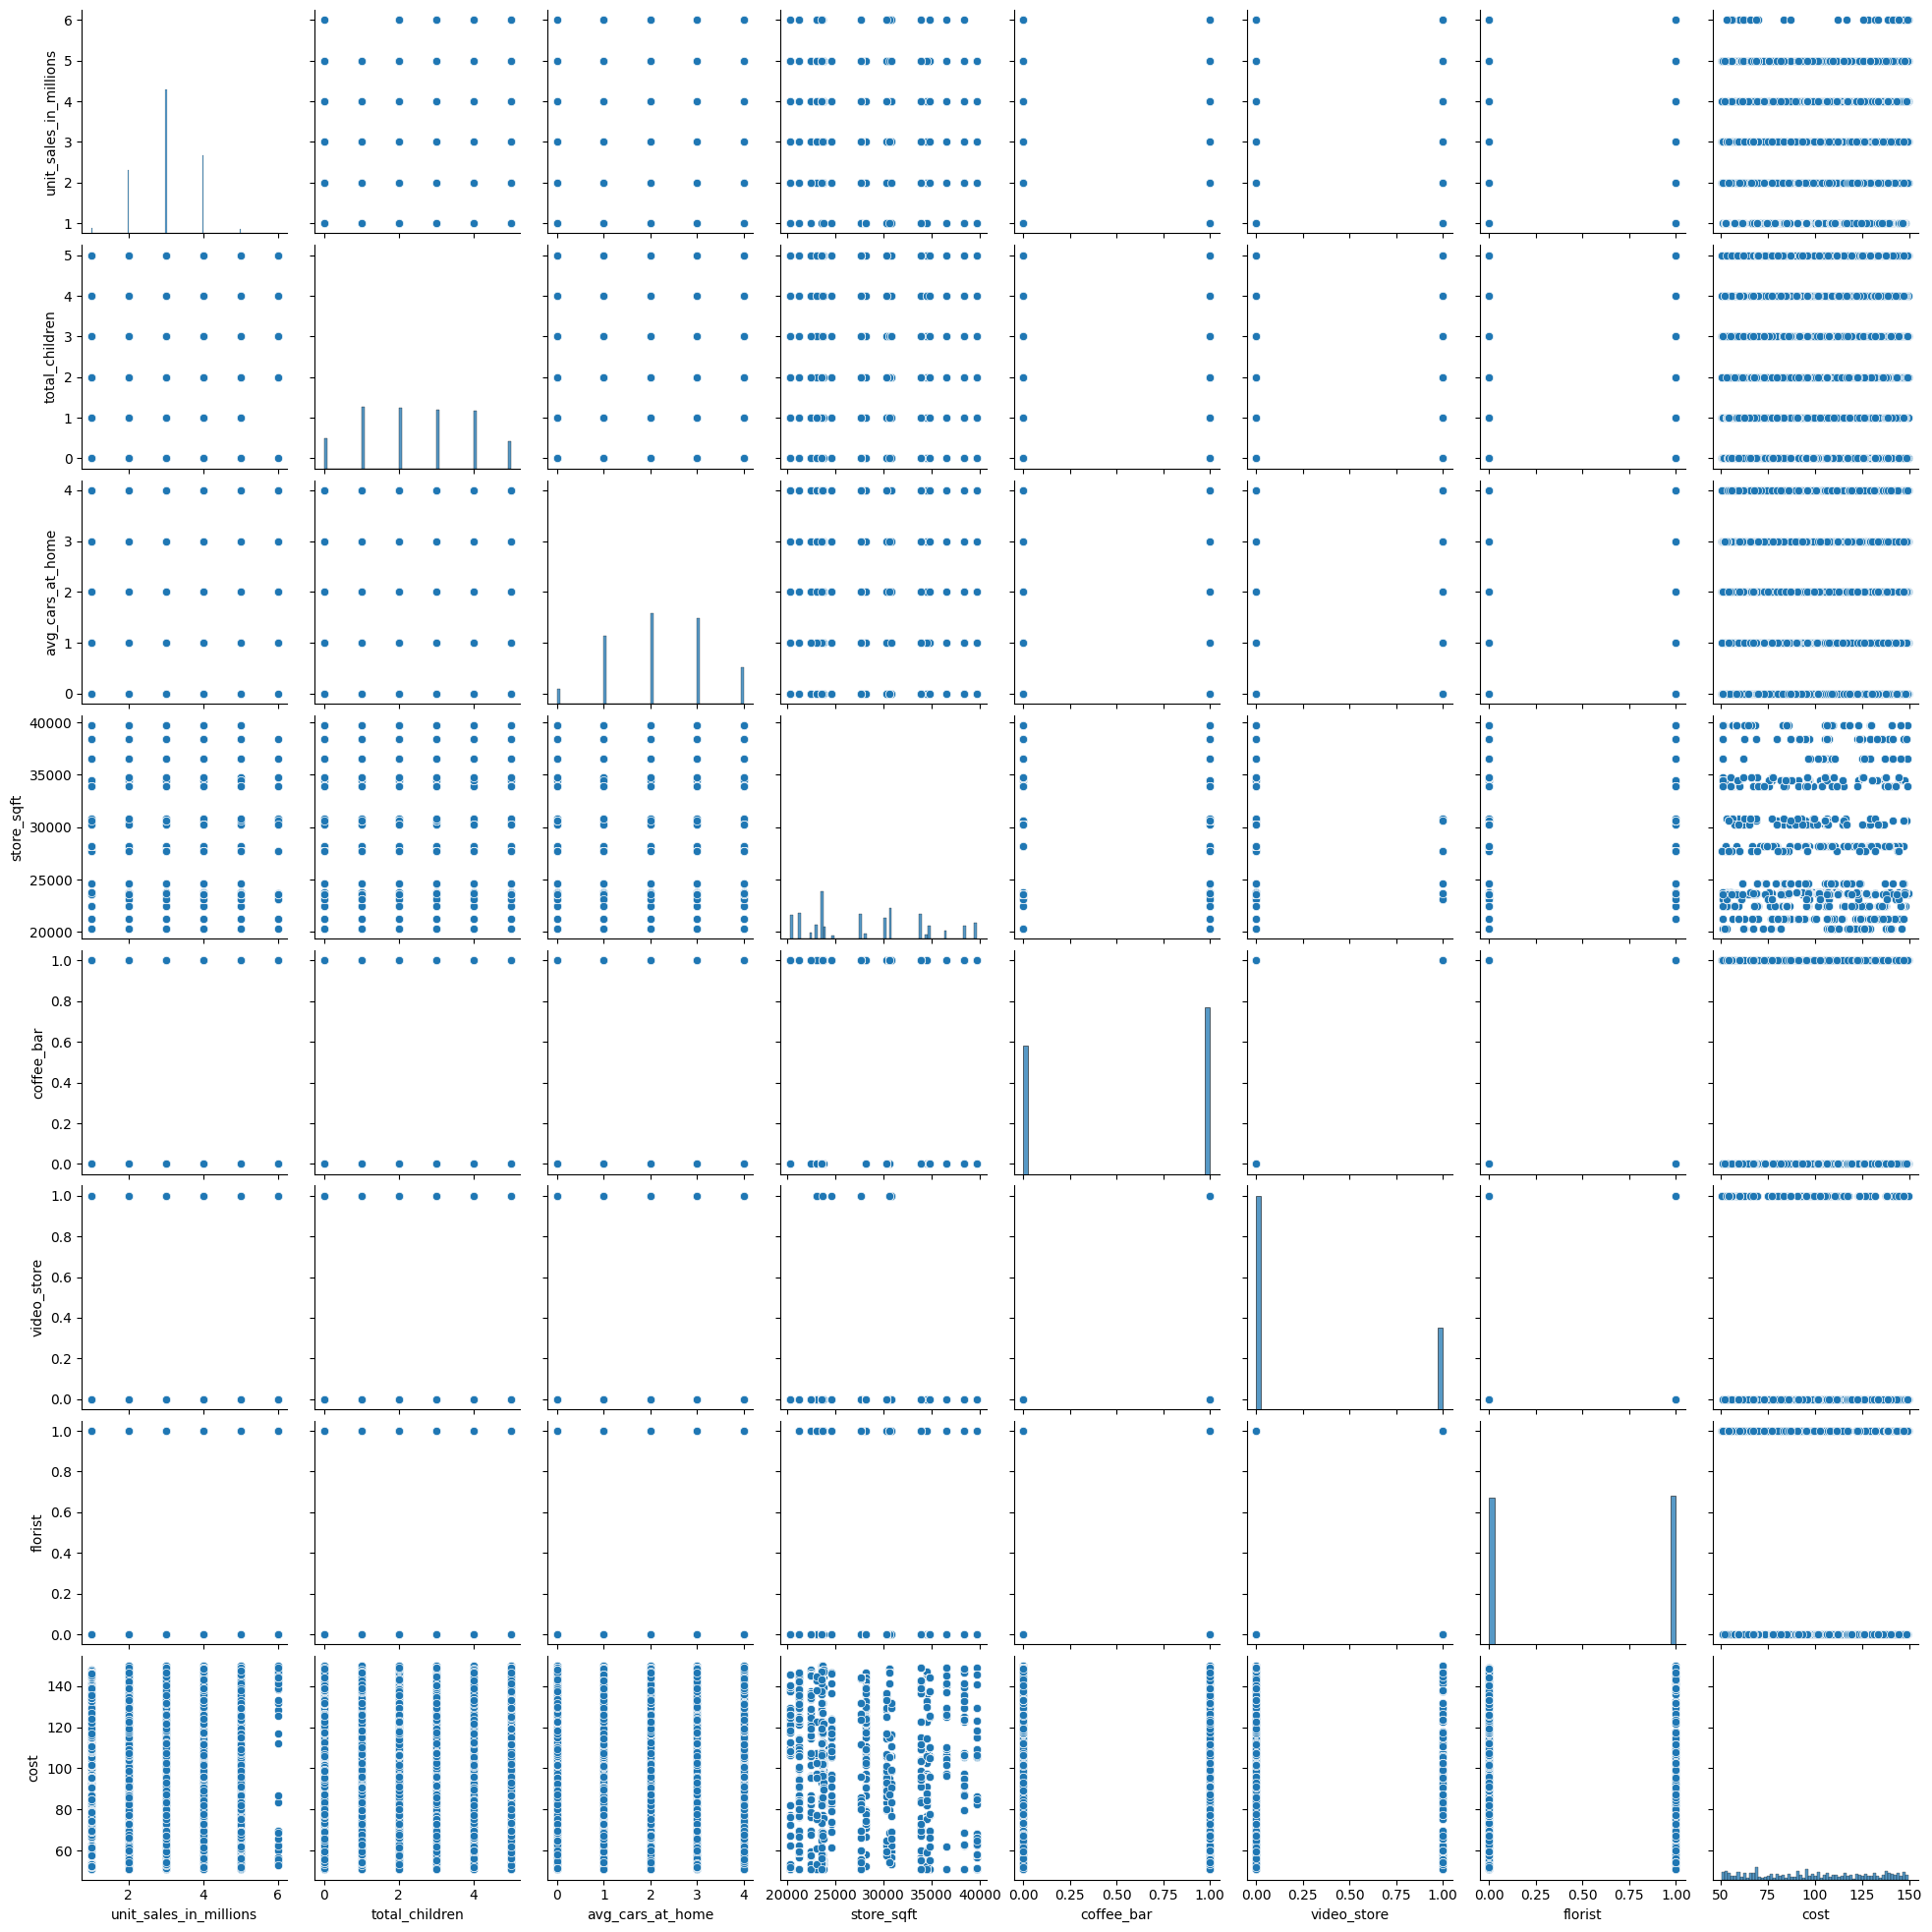

In [ ]:
import seaborn as sns
sns.pairplot(data=newDf)